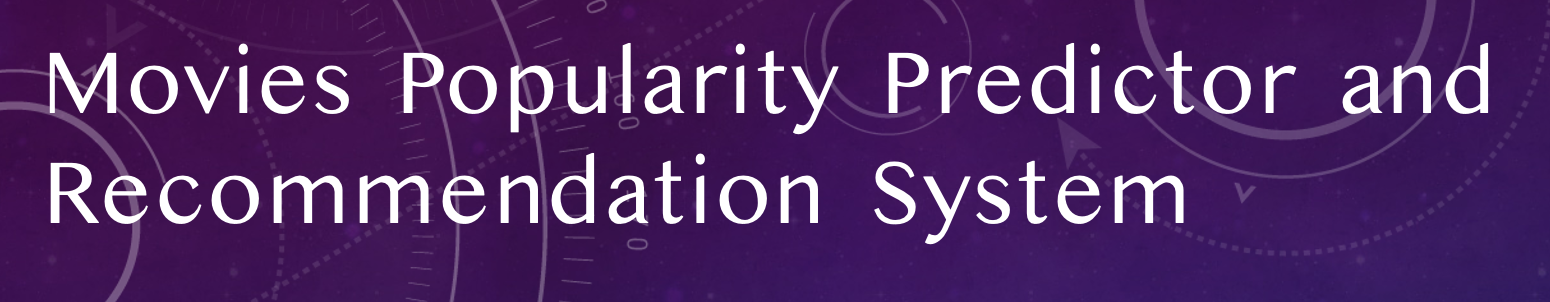

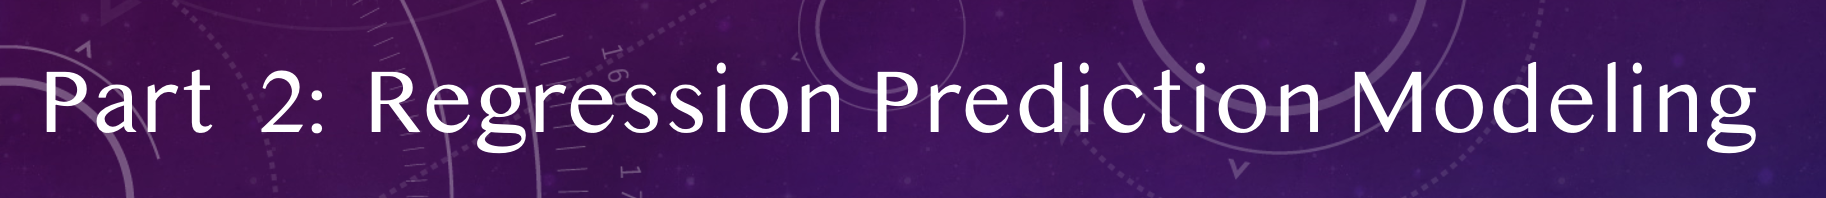

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Merge-the-data" data-toc-modified-id="Merge-the-data-0.1">Merge the data</a></span></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-1">Regression</a></span></li><li><span><a href="#Selecting-best-features" data-toc-modified-id="Selecting-best-features-2">Selecting best features</a></span></li><li><span><a href="#ML" data-toc-modified-id="ML-3">ML</a></span></li></ul></div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Sklearn
import seaborn as sns
import sklearn
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Deep learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# tmdb 5000 DATA

In [ ]:
try:
    df = pd.read_csv(r'tmdb_5000_credits.csv')
    # Continue with further data processing or analysis
    print("Data parsing successful!")
except pd.errors.ParserError as e:
    print("Parsing error occurred:")
    print(e)
    print("Error tokenizing data. Please check the file for formatting issues.")
except FileNotFoundError:
    print(f"File '{filename}' not found. Please provide the correct file path.")
except Exception as e:
    print("An error occurred:")
    print(e)

Data parsing successful!


In [ ]:
try:
    df = pd.read_csv(r'tmdb_5000_movies.csv')
    # Continue with further data processing or analysis
    print("Data parsing successful!")
except pd.errors.ParserError as e:
    print("Parsing error occurred:")
    print(e)
    print("Error tokenizing data. Please check the file for formatting issues.")
except FileNotFoundError:
    print(f"File '{'tmbd_5000_movies.csv'}' not found. Please provide the correct file path.")
except Exception as e:
    print("An error occurred:")
    print(e)

Data parsing successful!


In [ ]:
# Uploading and viewing the data
tmdb_5000_cred = pd.read_csv(r'tmdb_5000_credits.csv', index_col=False)
tmdb_5000_cred.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Uploading and viewing the data
tmdb_5000_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [ ]:
# Uploading and viewing the data
tmdb_5000_mov = pd.read_csv(r'tmdb_5000_movies.csv')
tmdb_5000_mov.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Checking the details of the data 
tmdb_5000_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### Merging the data

In [ ]:
# Merging the two data sets 
tmdb_5000_cred.columns = ['id','tittle','cast','crew']
tmdb_5000_mov = tmdb_5000_mov.merge(tmdb_5000_cred,on='id')

In [ ]:
# View more details 
tmdb_5000_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
# Checking the shape 
tmdb_5000_mov.shape

(4803, 23)

In [ ]:
# Display the first two rows of the dataset

tmdb_5000_mov[:2].T

,0,1
budget,237000000,300000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/
id,19995,285
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
original_language,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha..."
popularity,150.437577,139.082615
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."


**Pularity** IMDbPro uses proprietary algorithms that take into account several measures of popularity for people, titles and companies. The primary measure is who and what people are looking at on IMDb. The rankings are updated on a weekly basis, typically by the end of Monday.

This line filters the dataset to exclude rows where  'revenue' = 0. Those rows represent movies that did not generate any revenue, and therefore do not provide relevant information for our analysis.

In [ ]:
# Filtering data where revenue is not 0
tmdb_5000_mov[tmdb_5000_mov['revenue']!=0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,33693,"[{""id"": 171993, ""name"": ""mumblecore""}]",en,Funny Ha Ha,"Unsure of what to do next, 23-year-old Marnie ...",0.362633,[],...,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Funny Ha Ha,6.3,8,Funny Ha Ha,"[{""cast_id"": 1, ""character"": ""Marnie"", ""credit...","[{""credit_id"": ""52fe45309251416c9102a535"", ""de..."
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]",...,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Fl

In [ ]:
# Checking shape  
tmdb_5000_mov.shape

(4803, 23)

### Preparing the data for modeling 
*  Encoding the data.
* Split the data into dependent and independent variables.
* Performed a train-test split on the data.
* Scale the data separately to avoid leakage.

In [ ]:
# List the variables 
list(tmdb_5000_mov)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'tittle',
 'cast',
 'crew']

In [ ]:
# Create a copy for the data 
df = tmdb_5000_mov.copy()

In [ ]:
# Selecting only the important variables that are relevant for our analysis.
imp_cols = ['budget', 'genres','popularity','original_language',
            'runtime','vote_average','vote_count','release_date']

In [ ]:
# Creating a dataframe with all the important columns  
df = df[imp_cols]

In [ ]:
# Convert release_date to datetime if it's not already in datetime format
df['release_date'] = pd.to_datetime(df['release_date'], 
                                               errors='coerce')

# Extract the month from the release_date column
df['release_date_month'] = df['release_date'].dt.month

In [ ]:
df.drop('release_date',axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['release_date_month'] = df['release_date_month'].astype('int')

In [ ]:
df['release_date_month'] = df['release_date_month'].astype('object')

Creating a function that extractd the name from a list of dictionaries

In [ ]:
# Running the function 
def get_val(dictionary_list):
    val = [d['name'] for d in eval(dictionary_list)]
    return val

In [ ]:
# Running a lmabda function for the genres column 
from tqdm.notebook import tqdm
tqdm.pandas()
df['genres'] = df['genres'].progress_apply(get_val)

  0%|          | 0/4800 [00:00<?, ?it/s]

In [ ]:
# Viewing the data
df

,budget,genres,popularity,original_language,runtime,vote_average,vote_count,release_date_month
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,en,162.0,7.2,11800,12
1,300000000,"[Adventure, Fantasy, Action]",139.082615,en,169.0,6.9,4500,5
2,245000000,"[Action, Adventure, Crime]",107.376788,en,148.0,6.3,4466,10
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,en,165.0,7.6,9106,7
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,en,132.0,6.1,2124,3
...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",14.269792,es,81.0,6.6,238,9
4799,9000,"[Comedy, Romance]",0.642552,en,85.0,5.9,5,12
4800,0,"[Comedy, Drama, Romance, TV Movie]",1.444476,en,120.0,7.0,6,10
4801,0,[],0.857008,en,98.0,5.7,7,5


#### Preparing for modeling 

In [ ]:
# The code sums up all the genres in the 'genres' & converts them into unique genres.
all_genre = set(sum(df['genres'],[]))

The code iterates over each genre in the 'all_genre' set and creates a new binary column for each genre.

If a movie belongs to a particular genre, the corresponding genre column value is set to 1, otherwise it is set to 0.

In [ ]:
# Running the function  
all_genre = set(sum(df['genres'],[]))
for gen in tqdm(all_genre):
    df[gen] = df['genres'].apply(lambda x: 1 if gen in x else 0)

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
# Removing the original gernes
df.drop('genres',axis=1,inplace=True)

Using one-hot encoding of categorical variables. It creates new columns for each unique category and assigns binary values 


In [ ]:
# Using get_dummies to do one-hot encoding  
df = pd.get_dummies(df)

In [ ]:
# Checking the data  
df.head()

,budget,popularity,runtime,vote_average,vote_count,Action,Science Fiction,Western,Adventure,Romance,...,release_date_month_3,release_date_month_4,release_date_month_5,release_date_month_6,release_date_month_7,release_date_month_8,release_date_month_9,release_date_month_10,release_date_month_11,release_date_month_12
0,237000000,150.437577,162.0,7.2,11800,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,300000000,139.082615,169.0,6.9,4500,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,245000000,107.376788,148.0,6.3,4466,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,250000000,112.312950,165.0,7.6,9106,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,260000000,43.926995,132.0,6.1,2124,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Dropping null values
df.dropna(inplace=True)

In [ ]:
# Splitting the data into Independent and Dependent Variables
X = df.drop('popularity',axis=1)
y = df['popularity']

In [ ]:
# Splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.20, random_state=42)

In [ ]:
# Checking X_train
X_train.nunique()

budget                    384
runtime                   148
vote_average               69
vote_count               1420
Action                      2
                         ... 
release_date_month_8        2
release_date_month_9        2
release_date_month_10       2
release_date_month_11       2
release_date_month_12       2
Length: 73, dtype: int64

In [ ]:
# Storing scaling 
scale = StandardScaler()

In [ ]:
# Storing column names
cols = list(X_train)

In [ ]:
# Scale train and test 
X_train = scale.fit_transform(X_train)

X_test = scale.transform(X_test)

In [ ]:
X_test

array([[ 1.04537008, -0.4321873 , -0.74299281, ...,  3.04875486,
        -0.26782009, -0.32360171],
       [-0.71208602, -0.60699236, -1.90342666, ..., -0.32800276,
        -0.26782009, -0.32360171],
       [-0.71208602, -0.78179742, -0.66010468, ..., -0.32800276,
        -0.26782009, -0.32360171],
       ...,
       [-0.28527525,  0.22333167,  0.99765796, ..., -0.32800276,
        -0.26782009, -0.32360171],
       [ 0.116429  , -0.47588856, -0.99165721, ..., -0.32800276,
        -0.26782009, -0.32360171],
       [ 1.42196781, -0.12627845,  0.25166477, ..., -0.32800276,
        -0.26782009, -0.32360171]])

In [ ]:
# Viewing X_train
X_train

array([[-3.85701313e-01, -1.00030374e+00, -4.94328415e-01, ...,
        -3.28002758e-01, -2.67820094e-01, -3.23601710e-01],
       [-4.10807829e-01, -9.12901210e-01, -5.77216548e-01, ...,
         3.04875486e+00, -2.67820094e-01, -3.23601710e-01],
       [-7.12086016e-01, -8.25498681e-01,  3.34552906e-01, ...,
        -3.28002758e-01, -2.67820094e-01, -3.23601710e-01],
       ...,
       [-7.12086016e-01, -1.26278446e-01,  5.83217303e-01, ...,
        -3.28002758e-01, -2.67820094e-01, -3.23601710e-01],
       [-7.12086016e-01, -4.75888564e-01,  3.00037770e-03, ...,
        -3.28002758e-01, -2.67820094e-01, -3.23601710e-01],
       [ 6.68772342e-01,  5.29240524e-01,  6.66105435e-01, ...,
        -3.28002758e-01,  3.73384979e+00, -3.23601710e-01]])

In [ ]:
# See the scaling of X_train
X_train = pd.DataFrame(X_train,columns=cols)

Steps for Regression Modeling Approach:

* We will start with a baseline model using ordinary least squares (OLS) regression

* We will select the best features based on their significance

* Then we will implement three machine learning models: Random Forest, XGBoost, and AdaBoost

* We will follow by training  a general MLP (Multi-Layer Perceptron) model 

* Ultimately, we will evaluate the performance of each model and compare their results

### Regression

In [ ]:
# Checking shape 
print('y_train shape:', y_train.shape,'X_train shape:', X_train.shape)

y_train shape: (3840,) X_train shape: (3840, 73)


In [ ]:
# Resetting index 
y_train.reset_index(drop=True,inplace=True)

In [ ]:
# Running the OLS regression model. 
X_train # Using the best features for the model
X_train_int = sm.add_constant(X_train) #Fitting the training data
model_3 = sm.OLS(y_train, X_train).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.423
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              40.75
Date:                Wed, 10 May 2023   Prob (F-statistic):                        0.00
Time:                        02:02:48   Log-Likelihood:                         -18323.
No. Observations:                3840   AIC:                                  3.678e+04
Df Residuals:                    3772   BIC:                                  3.721e+04
Df Model:                          68                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
budget                    1.2514      0.666      1.879      0.060      -0.055       2.557
runtime                   0.2224      0.605      0.368      0.713      -0.963       1.408
vote_average              1.2518      0.552      2.270      0.023       0.170       2.333
vote_count               22.6170      0.623     36.282      0.000      21.395      23.839
Action                   -0.2491      0.579     -0.430      0.667      -1.385       0.887
Science Fiction          -0.2404      0.506     -0.475      0.635      -1.232       0.751
Western                  -0.0688      0.477     -0.144      0.885      -1.004       0.866
Adventure                 0.9276      0.563      1.648      0.099      -0.176       2.031
Romance                  -0.0631      0.508     -0.124      0.901      -1.059       0.933
Crime                    -0.0850      0.516     -0.165      0.869      -1.097       0.928
Comedy                    0.3337      0.568      0.588      0.557      -0.780       1.447
Music                     0.0052      0.475      0.011      0.991      -0.927       0.937
Documentary              -0.6682      0.505     -1.323      0.186      -1.658       0.322
Family                   -0.0998      0.594     -0.168      0.867      -1.264       1.065
Horror                    0.3213      0.547      0.588      0.557      -0.750       1.393
Thriller                  1.1923      0.576      2.069      0.039       0.063       2.322
Drama                    -0.5375      0.600     -0.895      0.371      -1.714       0.639
War                       0.1170      0.510      0.229      0.819      -0.884       1.118
Animation                 1.1082      0.590      1.880      0.060      -0.048       2.264
Fantasy                  -0.0862      0.505     -0.171      0.865      -1.077       0.904
Mystery                   0.0999      0.497      0.201      0.841      -0.874       1.074
History                   0.0496      0.526      0.094      0.925      -0.981       1.080
TV Movie                 -0.1979      0.468     -0.423      0.672      -1.115       0.719
Foreign                  -0.4515      0.484     -0.933      0.351      -1.400       0.497
original_language_af     -0.0811      0.466     -0.174      0.862      -0.995       0.832
original_language_ar     -0.0403      0.467     -0.086      0.931      -0.956       0.876
original_language_cn      0.0235      0.463      0.051      0.959      -0.883       0.930
original_language_cs     -0.0770      0.466     -0.165      0.869      -0.990       0.836
original_language_da      0.0846      0.464      0.182      0.855      -0.825       0.995
original_language_de     -0.1208      0.454     -0.266      0.790      -1.010       0.768
original_langu

### Selecting best features 

In [ ]:
model_3

In [ ]:
# Selecting the best features using SelectKBest
# Selecting the top 5 features
selector = SelectKBest(score_func=f_regression, k=5) 
ch = selector.fit(X_train, y_train)
X_train_selectk = ch.transform(X_train)

In [ ]:
 # fit and transform using selector
# X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)
# Print the selected feature names
col_sel = X_train.columns[selected_features]
col_sel = list(col_sel)
col_sel

['budget', 'runtime', 'vote_average', 'vote_count', 'Adventure']

In [ ]:
X_test_selectk = selector.transform(X_test)

In [ ]:
# y  = mx + c

In [ ]:
# See the scaling of X_train
X_train_selectk = pd.DataFrame(X_train_selectk,columns=col_sel)

# Resetting index 

# y_train.reset_index(drop=True,inplace=True)

# Adding a constant column to the selected features
X_train_int = sm.add_constant(X_train_selectk)

# Creating the OLS model
model = sm.OLS(y_train, X_train_int)

# Fitting the model
OLS_SF = model.fit()

# Printing the summary
OLS_SF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1238.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        02:02:48   Log-Likelihood:                -16796.
No. Observations:                3840   AIC:                         3.360e+04
Df Residuals:                    3834   BIC:                         3.364e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           21.2804      0.310     68.615      0.000      20.672      21.888
budget           1.6855      0.413      4.082      0.000       0.876       2.495
runtime         -0.2952      0.345     -0.856      0.392      -0.971       0.381
vote_average     1.1727      0.348      3.366      0.001       0.490       1.856
vote_count      22.7945      0.404     56.394      0.000      22.002      23.587
Adventure        0.9743      0.337      2.887      0.004       0.313       1.636
==============================================================================
Omnibus:                     8472.133   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         85043533.707
Skew:                          19.661   Prob(JB):                         0.00
Kurtosis:                     730.994   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We build a function to calculate and return the mean squared error (MSE) and root mean squared error (RMSE) score. It also adds the results to a pandas dataframe for later use.

In [ ]:
# X_train_selectk = pd.DataFrame(X_train_selectk,columns=col_sel)

In [ ]:
# Plot y_test vs. y_pred
# Function to calculate RMSE and MSE 

results_df_ml = pd.DataFrame([],columns=['Model','MSE','RMSE'])

def  get_results(reg,x_test):
    mname = ''
    
    if 'statsmodels' in str(type(reg)):
        x_test = sm.add_constant(x_test)
        star = '*'
        mname = 'OLS + SelectK'
        
  # Getting predicted values 
    y_pred = reg.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)

    rmse = mean_squared_error(y_test, y_pred,squared=False)

    print('mse',mse)
    print('rmse',rmse)

    #Obtaining the name for the reg model
    if not mname:
        mname = type(reg).__name__
        
    results_df_ml.loc[len(results_df_ml)] = [mname,mse,rmse]
    return results_df_ml 


In [ ]:
# Run the function 
get_results(OLS_SF, X_test_selectk)

# https://datascience.stackexchange.com/questions/26555/valueerror-shapes-1-10-and-2-not-aligned-10-dim-1-2-dim-0
# https://stackoverflow.com/questions/54003129/valueerror-shapes-993-228-and-1-228-not-aligned-228-dim-1-1-dim-0

mse 497.7024341665461
rmse 22.309245486267482


,Model,MSE,RMSE
0,OLS + SelectK,497.702434,22.309245


### Machine Learning Models

*Random Forest*
Random Forest is an algorithm that combines multiple decision trees to make predictions.

It hands complex datasets. Random Forest aggregates the predictions of multiple trees, and that way it reduces overfitting and improves prediction accuracy.

In [ ]:
# Storing Random Forest
#reg = RandomForestRegressor()

In [ ]:
# Fitting Random Forest 
#reg.fit(X_train,y_train)

In [ ]:
# Storing predicted values
#y_pred = reg.predict(X_test)

In [ ]:
# Calculating mse
#mean_squared_error(y_test,y_pred)

In [ ]:
# Calculating rsme
#mean_squared_error(y_test,y_pred,squared=False)

In [ ]:
# Creating a data frame for the predicted values 
#d = pd.DataFrame({'True':y_test,'Pred':y_pred})

In [ ]:
# Viewing the dataframe
#d

# https://www.google.com/search?q=mse+vs+rmse+sklearn&oq=&aqs=chrome.1.69i57j69i59j0i433i650j46i131i199i433i465i512l2j0i131i433i512j0i433i650j0i433i512j0i131i433i512j0i433i512.182474j0j4&sourceid=chrome&ie=UTF-8#ip=1

* Initializing the models (Random Forest, XGBoost, and AdaBoost) 
* Creating an empty DataFrame to store the results.
* Iterating through each model and performs the following:
   1. Fitting the model using the training data.
   2. Obtaining predictions on the test data.
   3. Calculating the (MSE) and (RMSE) between the predicted and actual values.
   4. Adding the model name, MSE, and RMSE to the results DataFrame.
* Returning the results DataFrame containing the model names, MSE, and RMSE for each model.

In [ ]:
results_df_ml

,Model,MSE,RMSE
0,OLS + SelectK,497.702434,22.309245


In [ ]:
def run_regression_models(X_train, y_train, X_test, y_test):
    # Initialize the models
    models = {
        'Random Forest': RandomForestRegressor(),
        'XGBoost': XGBRegressor(),
        'AdaBoost': AdaBoostRegressor()
    
    }

    # Initialize the DataFrame to store results
#     results_df_ml = pd.DataFrame(columns=['Model', 'MSE', 'RMSE'])

    # Loop through each model
    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate MSE and RMSE
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

#         results_df_ml
        # Add results to the DataFrame
    
        results_df_ml.loc[len(results_df_ml)] = [model_name,mse,rmse]
#         results_df_ml = results_df_ml.append({
#             'Model': model_name,
#             'MSE': mse,
#             'RMSE': rmse
#         }, ignore_index=True)

    return results_df_ml



In [ ]:
# Viewing resutls of the ML models
results_df_ml = run_regression_models(X_train, y_train, X_test, y_test)
results_df_ml

,Model,MSE,RMSE
0,OLS + SelectK,497.702434,22.309245
1,Random Forest,577.101787,24.022943
2,XGBoost,936.585283,30.603681
3,AdaBoost,832.481589,28.852757


In [ ]:
# get optimal model

results_df_ml.sort_values('RMSE',inplace=True)
optimal_model = results_df_ml['Model'][0]
print(optimal_model)

OLS + SelectK


* The Random Forest model has the lowest RMSE value of 23.98. It has the best performance among the three models. 



In [ ]:
# #Adding the OLS model as well 
# results_df_ml= results_df_ml.append(results_df, ignore_index=True)

# # Print the updated DataFrame
# results_df_ml

### Multilayer Perceptron MLP

MLP is a type of neural network that consists of 3 or more layers of  neurons. MLP, short for MLP, is a type of neural network that is composed of multiple layers of nodes, with each node being a simple computational unit that performs a mathematical operation. The MLP takes input data, processes it through the layers of nodes, and produces output predictions.

During training, the weights  between nodes are adjusted through a process called backpropagation. The weights  are updated to minimize the difference between the predicted outputs and the actual outputs.

In [ ]:
# Setting the input shape
input_shape = (X_train.shape[1],)
print(f'Feature shape: {input_shape}')

Feature shape: (73,)


In [ ]:
# Initializing callback
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='mean_squared_error', min_delta=1e-4, patience=5)]

In [ ]:
# Create the model
mlp_model = Sequential()
mlp_model.add(Dense(16, input_shape=input_shape, activation='relu'))
mlp_model.add(Dense(8, activation='relu'))
mlp_model.add(Dense(1, activation='linear'))

# Configure the model and start training
mlp_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
mlp_model.fit(X_train[:100], y_train[:100], epochs=5, batch_size=32, 
          verbose=1, validation_split=0.2,callbacks=callbacks)

Epoch 1/5
3/3 [==============================] - 1s 106ms/step - loss: 587.8556 - mean_squared_error: 587.8556 - val_loss: 551.8964 - val_mean_squared_error: 551.8964 - lr: 0.0010
Epoch 2/5
3/3 [==============================] - 0s 20ms/step - loss: 584.9536 - mean_squared_error: 584.9536 - val_loss: 549.8607 - val_mean_squared_error: 549.8607 - lr: 0.0010
Epoch 3/5
3/3 [==============================] - 0s 18ms/step - loss: 582.0470 - mean_squared_error: 582.0470 - val_loss: 547.6862 - val_mean_squared_error: 547.6862 - lr: 0.0010
Epoch 4/5
3/3 [==============================] - 0s 16ms/step - loss: 579.2767 - mean_squared_error: 579.2767 - val_loss: 545.4251 - val_mean_squared_error: 545.4251 - lr: 0.0010
Epoch 5/5
3/3 [==============================] - 0s 18ms/step - loss: 576.0267 - mean_squared_error: 576.0267 - val_loss: 543.1614 - val_mean_squared_error: 543.1614 - lr: 0.0010


In [ ]:
# true vs predicted
out = pd.DataFrame({
    'y_true':y_test[:10],
    'y_pred':mlp_model.predict(X_test[:10]).ravel()
}
).T


out

1/1 [==============================] - 0s 86ms/step


,596,3371,3049,2909,8,577,2868,811,3510,1538
y_true,13.267631,2.881239,5.842299,4.759190,98.885637,42.957216,8.708229,29.972240,2.135689,32.217425
y_pred,0.138595,0.987897,1.065530,1.220948,3.055614,1.170236,0.051835,1.207899,1.984809,1.893546


In [ ]:
# # Train the model
# from sklearn.preprocessing import OneHotEncoder

# onehot_encoder = OneHotEncoder()
# y_train_encoded = onehot_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
# model.fit(X_train, y_train_encoded, epochs=3, batch_size=32, verbose=1)


In [ ]:
# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

30/30 [==============================] - 0s 1ms/step


In [ ]:
# Calculate mean squared error
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
print('Mean Squared Error:', mlp_mse)

Mean Squared Error: 1633.8073892488092


In [ ]:
X_train.shape

(3840, 73)

In [ ]:
# Calculate root mean squared error
mlp_rmse = mean_squared_error(y_test, y_pred_mlp,squared=False)
print('Root Mean Squared Error:', round(mlp_rmse,3))

Root Mean Squared Error: 40.42


In [ ]:

# Adding results for mlp model
mlp_results = {'Model': 'MLP', 'MSE': mlp_mse, 'RMSE': mlp_rmse}
results_df_ml = results_df_ml.append(mlp_results, ignore_index=True)
results_df_ml

,Model,MSE,RMSE
0,OLS + SelectK,497.702434,22.309245
1,Random Forest,577.101787,24.022943
2,AdaBoost,832.481589,28.852757
3,XGBoost,936.585283,30.603681
4,MLP,1633.807389,40.420383


In [ ]:
import plotly.graph_objects as go

# Sorting by RMSE in descending order
results_df_ml_sorted = results_df_ml.sort_values(by='RMSE', 
                                                 ascending=False)

# Creating a bar plot with RMSE values in descending order
fig = go.Figure(data=go.Bar(x=results_df_ml_sorted['Model'],
                            y=results_df_ml_sorted['RMSE'], 
                            marker_color='lightskyblue'))

# Find the index of the lowest RMSE value
lowest_rmse_index = results_df_ml_sorted['RMSE'].idxmin()

# Add a marker for the lowest RMSE value
fig.add_trace(go.Scatter(x=[results_df_ml_sorted['Model'][lowest_rmse_index]], y=[results_df_ml_sorted['RMSE'][lowest_rmse_index]],
                         mode='markers', marker=dict(color='red', size=10), name='Lowest RMSE'))

# Customize the layout
fig.update_layout(title='RMSE Comparison',
                  xaxis_title='Model',
                  yaxis_title='RMSE',
                  showlegend=True)

# Show the plot
fig.show()

### Hypertune Random Forest

In [ ]:
results_df_ml

,Model,MSE,RMSE
0,OLS + SelectK,497.702434,22.309245
1,Random Forest,577.101787,24.022943
2,AdaBoost,832.481589,28.852757
3,XGBoost,936.585283,30.603681
4,MLP,1633.807389,40.420383


In [ ]:
from sklearn.model_selection import GridSearchCV

# https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}

In [ ]:
# Create the Random Forest regressor
rf = RandomForestRegressor(n_jobs=-1) # 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Perform randomized search with progress bar
gird_search_rf = GridSearchCV(estimator=rf, 
                                      param_grid=parameters,
                                      verbose=1,n_jobs=-1,
                                      cv=3)

In [ ]:
#with tqdm(total=10, desc="Hyperparameter Tuning (Random Forest)") as pbar:
rf_model = gird_search_rf.fit(X_train[:100], y_train[:100])
   # pbar.update(1)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
grid_rf = rf_model.best_estimator_

In [ ]:
grid_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=150, n_jobs=-1)

In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
# Get the best hyperparameters and model
# best_params_rf = random_search_rf.best_params_
# best_model_rf = random_search_rf.best_estimator_

In [ ]:
# Calculate 
tuned_rf_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Root Mean Squared Error:', round(tuned_rf_rmse,3))


Root Mean Squared Error: 23.526


In [ ]:
tuned_rf_mse = mean_squared_error(y_test, y_pred,squared=True)
print('Mean Squared Error:', round(tuned_rf_mse,3))

Mean Squared Error: 553.482


In [ ]:
# Adding results for mlp model
grid_rf_results = {'Model': 'RF_Tuned', 'MSE': tuned_rf_mse, 
                   'RMSE': tuned_rf_rmse }

results_df_ml = results_df_ml.append(grid_rf_results, 
                                     ignore_index=True)
results_df_ml

,Model,MSE,RMSE
0,OLS + SelectK,497.702434,22.309245
1,Random Forest,577.101787,24.022943
2,AdaBoost,832.481589,28.852757
3,XGBoost,936.585283,30.603681
4,MLP,1633.807389,40.420383
5,RF_Tuned,553.481922,23.526197


In [ ]:
tuned_rf_mse = mean_squared_error(y_test, y_pred,squared=True)
print('Mean Squared Error:', round(tuned_rf_mse,3))

Mean Squared Error: 553.482


In [ ]:
# Evaluate the best model
test_loss_rf = mean_squared_error(y_test, y_pred,squared=True)

In [ ]:
test_loss_rf

553.481922113498

#### Hypertune MLP 

In [ ]:
# #  Define the parameter grid
# param_grid_mlp = {
#     'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
#     'learning_rate_init': [0.001, 0.01, 0.1]
# }



In [ ]:
# Create the MLP regressor
mlp = mlp_model

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikeras.wrappers import KerasRegressor
# Kmodel = KerasRegressor(build_fn=mlp, verbose=2,hidden_layer_sizes=(100,),
#                         learning_rate_init=0.001)

Kmodel = KerasRegressor(build_fn=mlp)
optimizers = ['rmsprop', 'adam']
# init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([50, 100])
batches = np.array([10, 20])
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid_search_mlp = GridSearchCV(estimator=Kmodel, param_grid=param_grid,
                               n_jobs=-1,cv=3,verbose=2)

In [ ]:
Kmodel.get_params().keys() # valid parameters

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])

In [ ]:
# # Perform grid search with progress bar
# grid_search_mlp = GridSearchCV(estimator=Kmodel, param_grid=param_grid_mlp, cv=3, n_jobs=-1,
#                                scoring='neg_mean_squared_error',verbose=2)

In [ ]:
# Fitting the mdoel
grid_search_mlp.fit(X_train[:100], y_train[:100])

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Epoch 1/50


5/5 [==============================] - 1s 3ms/step - loss: 565.9305 - mean_squared_error: 565.9305
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 561.0436 - mean_squared_error: 561.0436
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 555.7100 - mean_squared_error: 555.7100
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 550.2019 - mean_squared_error: 550.2019
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 543.6680 - mean_squared_error: 543.6680
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 538.1206 - mean_squared_error: 538.1206
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 531.9194 - mean_squared_error: 531.9194
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 525.1415 - mean_squared_error: 525.1415
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 517.1884 - mean_squared_error: 517.1884
Epoch 10/50
5/5 [====

GridSearchCV(cv=3,
             estimator=KerasRegressor(build_fn=<keras.engine.sequential.Sequential object at 0x7f5c16459ae0>),
             n_jobs=-1,
             param_grid={'batch_size': array([10, 20]),
                         'epochs': array([ 50, 100]),
                         'optimizer': ['rmsprop', 'adam']},
             verbose=2)

In [ ]:
# Get the best hyperparameters and model
best_params_mlp = grid_search_mlp.best_params_
best_model_mlp = grid_search_mlp.best_estimator_

In [ ]:
#best_model_mlp.model_.save('abc')

In [ ]:
best_model_mlp.model_.save('optimal_mlp')

from google.colab import files


files.download('optimal_mlp')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.models import load_model
# Instantiate the model as you please (we are not going to use this)
model2 = KerasRegressor(build_fn=mlp, epochs=10, batch_size=10, verbose=1)
model2.model = load_model('optimal_mlp')

In [ ]:
# Evaluate the best model
test_loss_mlp = mean_squared_error(y_test, best_model_mlp.predict(X_test))
test_loss_mlp

48/48 [==============================] - 0s 1ms/step


905.884437007962

In [ ]:
y_pred_mlp_tuned = best_model_mlp.predict(X_test)

48/48 [==============================] - 0s 4ms/step


In [ ]:
test_loss_mlp = mean_squared_error(y_test, y_pred_mlp_tuned,squared= False)
print('Root Mean Squared Error:', round(test_loss_mlp,3))

Root Mean Squared Error: 30.098


In [ ]:
#get_results(y_pred_mlp_tuned,y_pred)

In [ ]:
results_all = get_results(best_model_mlp, X_test)
results_all.sort_values('RMSE', inplace=True)

48/48 [==============================] - 0s 1ms/step
mse 905.884437007962
rmse 30.09791416374168


In [ ]:
results_all

,Model,MSE,RMSE
0,KerasRegressor,905.884437,30.097914


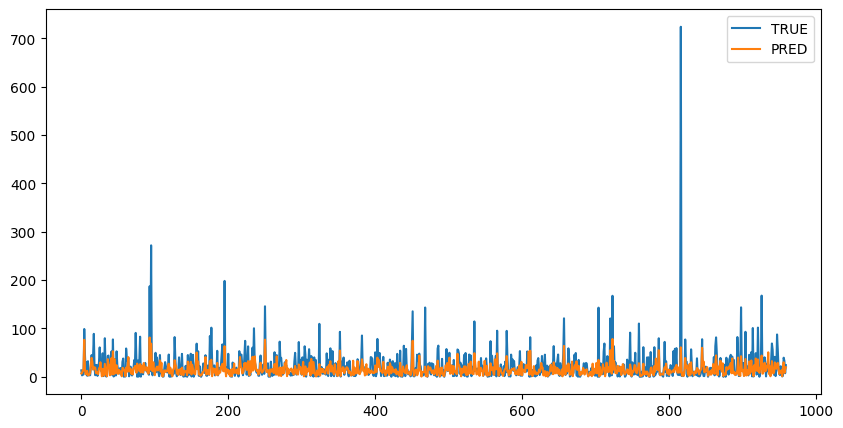

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(0,len(y_pred_mlp_tuned)),y_test,label='TRUE')
plt.plot(range(0,len(y_pred_mlp_tuned)),y_pred_mlp_tuned,label='PRED')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Sorting by RMSE in descending order
results_df_ml_sorted = results_df_ml.sort_values(by='RMSE', 
                                                 ascending=False)

# Creating a bar plot with RMSE values in descending order
fig = go.Figure(data=go.Bar(x=results_df_ml_sorted['Model'],
                            y=results_df_ml_sorted['RMSE'], 
                            marker_color='lightskyblue'))

# Find the index of the lowest RMSE value
lowest_rmse_index = results_df_ml_sorted['RMSE'].idxmin()

# Add a marker for the lowest RMSE value
fig.add_trace(go.Scatter(x=[results_df_ml_sorted['Model'][lowest_rmse_index]], y=[results_df_ml_sorted['RMSE'][lowest_rmse_index]],
                         mode='markers', marker=dict(color='red', size=10), name='Lowest RMSE'))

# Customize the layout
fig.update_layout(title='RMSE Comparison',
                  xaxis_title='Model',
                  yaxis_title='RMSE',
                  showlegend=True)

# Show the plot
fig.show()

In [ ]:
feature_names = list(X_train)

In [ ]:
forest = grid_rf

In [ ]:
import pandas as pd
import time
import numpy as np


start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.055 seconds


In [ ]:
forest_importances = pd.Series(importances, index=feature_names)

In [ ]:
forest_importances = forest_importances.sort_values(ascending=False)[:5]

<Axes: >

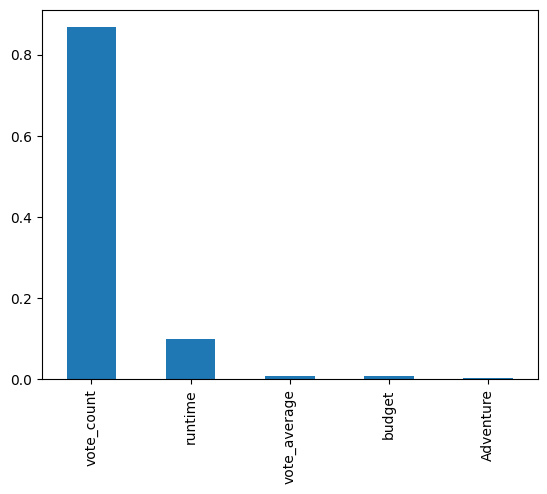

In [ ]:
forest_importances.plot.bar()